In [1]:
import pandas as pd
from datetime import UTC
from configurator import Config
from matplotlib.pyplot import gca, subplot, figure
from matplotlib.gridspec import GridSpec
from matplotlib.dates import DateFormatter
from common import root_from

In [2]:
config = Config.from_path('config.yaml')
root = root_from(config)

In [3]:
def lines(ax):
    ax.axhline(y=7.5, color='grey', linestyle='dotted', label='7.5kW')

In [4]:
def data_for(start: str, end: str) -> pd.DataFrame:
    start_dt = pd.Timestamp(start, tz=UTC)
    end_dt = pd.Timestamp(end, tz=UTC)    
    dfs = []
    for date in pd.date_range(start_dt, end_dt, normalize=True):
        path = root / date.strftime('zappi-%Y-%m-%d.csv')
        data = pd.read_csv(path, index_col='datetime', parse_dates=[0])
        data = data.reindex(
            index=pd.date_range(
                start=data.index.min(),
                end=data.index.max(),
                freq='1 min'
            ),
        )
        dfs.append(data)
    return pd.concat(dfs)[start_dt:end_dt]
        
    
data_for('2024-03-04 20:00', '2024-03-05 08:00')

,imp,gep,gen,h1b,nect1,v1,frq,volts,imp_kw,h1b_kw,exp,exp_kw,h1d,pect1
2024-03-04 20:00:00+00:00,8580.0,NaN,360.0,0.0,8580.0,2438.0,5012.0,243.8,0.143,0.0,0.0,0.000,NaN,NaN
2024-03-04 20:01:00+00:00,7860.0,NaN,420.0,0.0,7860.0,2439.0,5011.0,243.9,0.131,0.0,180.0,0.003,NaN,180.0
2024-03-04 20:02:00+00:00,8460.0,60.0,420.0,0.0,8460.0,2436.0,5010.0,243.6,0.141,0.0,720.0,0.012,NaN,720.0
2024-03-04 20:03:00+00:00,9060.0,NaN,540.0,0.0,9060.0,2438.0,5005.0,243.8,0.151,0.0,60.0,0.001,NaN,60.0
2024-03-04 20:04:00+00:00,8340.0,NaN,540.0,0.0,8340.0,2437.0,5001.0,243.7,0.139,0.0,240.0,0.004,NaN,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 07:56:00+00:00,6780.0,17880.0,NaN,0.0,6780.0,2415.0,4984.0,241.5,0.113,0.0,0.0,0.000,NaN,NaN
2024-03-05 07:57:00+00:00,7560.0,18480.0,NaN,0.0,7560.0,2416.0,4986.0,241.6,0.126,0.0,60.0,0.001,NaN,60.0
2024-03-05 07:58:00+00:00,6480.0,18600.0,NaN,0.0,6480.0,2424.0,4992.0,242.4,0.108,0.0,0.0,0.000,NaN,NaN
2024-03-05 07:59:00+00:00,6960.0,18660.0,NaN,0.0,6960.0,2427.0,5000.0,242.7,0.116,0.0,0.0,0.000,NaN,NaN


In [13]:
def plot_zappi(start: str, end: str):
    ax = gca()
    ax.set_title(f'myenergi: {start} to {end}')
    zappi_data = data_for(start, end)
    ax.plot(zappi_data['imp_kw'], label='imp (kw)')
    ax.plot(zappi_data['h1b_kw'], label='h1b (kw)')
    ax.plot(zappi_data['h1d_kw'], label='h1d (kw)')
    lines(ax)
    ax.legend()
    ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))

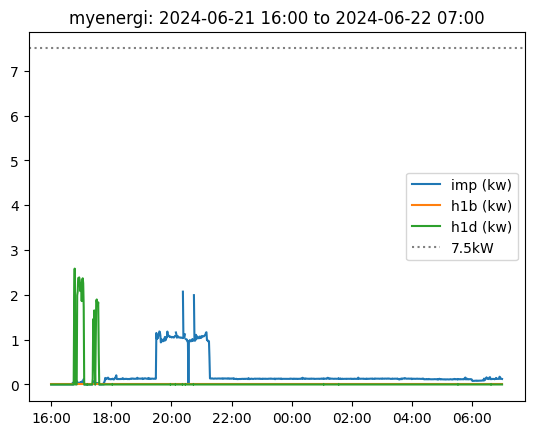

In [19]:
plot_zappi('2024-06-21 16:00', '2024-06-22 07:00')

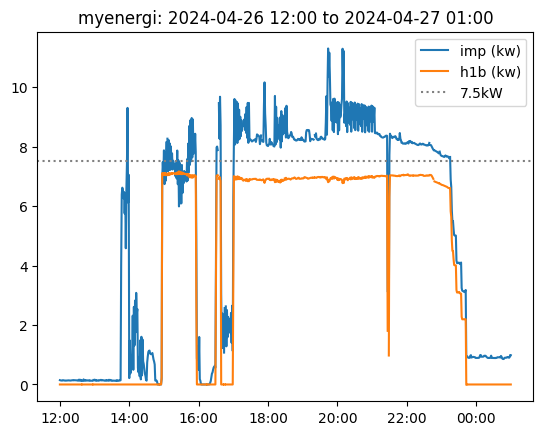

In [14]:
plot_zappi('2024-04-26 12:00', '2024-04-27 01:00')

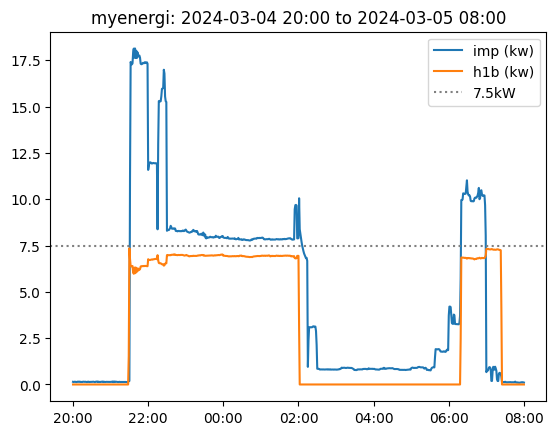

In [42]:
plot_zappi('2024-03-04 20:00', '2024-03-05 08:00')

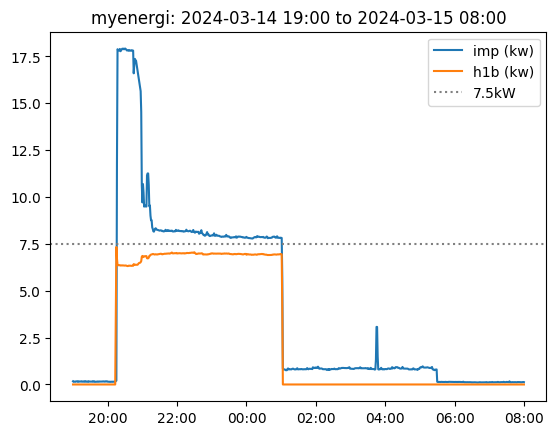

In [43]:
plot_zappi('2024-03-14 19:00', '2024-03-15 08:00')

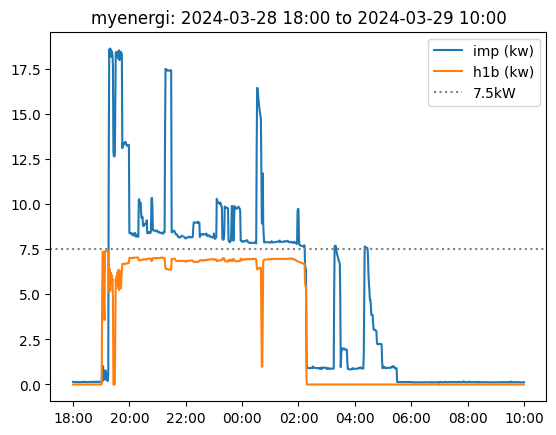

In [44]:
plot_zappi('2024-03-28 18:00', '2024-03-29 10:00')